# ATR - Average True Range

-  ATR is Averaged Market Movement both up and down<br>
-  It measures volatility.<br>
-  ATR is stock price specific. Stocks with higher price will have higher ATR.<br>
-  ATR is used to identify stop loss.<br> 
-  Can be used to weed out securities with extremely high volatility.<br> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nifty.csv", parse_dates=["date"], index_col="date")
df.head(2)

,open,high,low,close
date,,,,
2010-01-04,5201,5238,5167,5232
2010-01-05,5277,5288,5242,5278


<b><i>True Range = Max [ ( High − Low ), Abs ( High − Close Price Yesterday ), Abs ( Low − Close Price Yesterday ) ]</i></b>

In [3]:
df['High-Low']=df['high']-df['low']
df['High-Previous_Close']=abs(df['high']-df['close'].shift(1))
df['Low-Previous_Close']=abs(df['low']-df['close'].shift(1))
df['True_Range']=df[['High-Low','High-Previous_Close','Low-Previous_Close']].max(axis=1,skipna=False)
df.head(5)

,open,high,low,close,High-Low,High-Previous_Close,Low-Previous_Close,True_Range
date,,,,,,,,
2010-01-04,5201,5238,5167,5232,71,NaN,NaN,NaN
2010-01-05,5277,5288,5242,5278,46,56.0,10.0,56.0
2010-01-06,5278,5311,5260,5282,51,33.0,18.0,51.0
2010-01-07,5282,5303,5245,5263,58,21.0,37.0,58.0
2010-01-08,5264,5277,5235,5245,42,14.0,28.0,42.0


<b>Average True Range:</b> Exponential Moving Average of True Range

In [4]:
range_period = 14
df['ATR'] = df['True_Range'].ewm(com=range_period,min_periods=range_period).mean()
df.head(20)

,open,high,low,close,High-Low,High-Previous_Close,Low-Previous_Close,True_Range,ATR
date,,,,,,,,,
2010-01-04,5201,5238,5167,5232,71,NaN,NaN,NaN,NaN
2010-01-05,5277,5288,5242,5278,46,56.0,10.0,56.0,NaN
2010-01-06,5278,5311,5260,5282,51,33.0,18.0,51.0,NaN
2010-01-07,5282,5303,5245,5263,58,21.0,37.0,58.0,NaN
2010-01-08,5264,5277,5235,5245,42,14.0,28.0,42.0,NaN
2010-01-11,5264,5287,5228,5249,59,42.0,17.0,59.0,NaN
2010-01-12,5251,5301,5201,5210,100,52.0,48.0,100.0,NaN
2010-01-13,5213,5239,5170,5234,69,29.0,40.0,69.0,NaN
2010-01-14,5235,5273,5233,5260,40,39.0,1.0,40.0,NaN


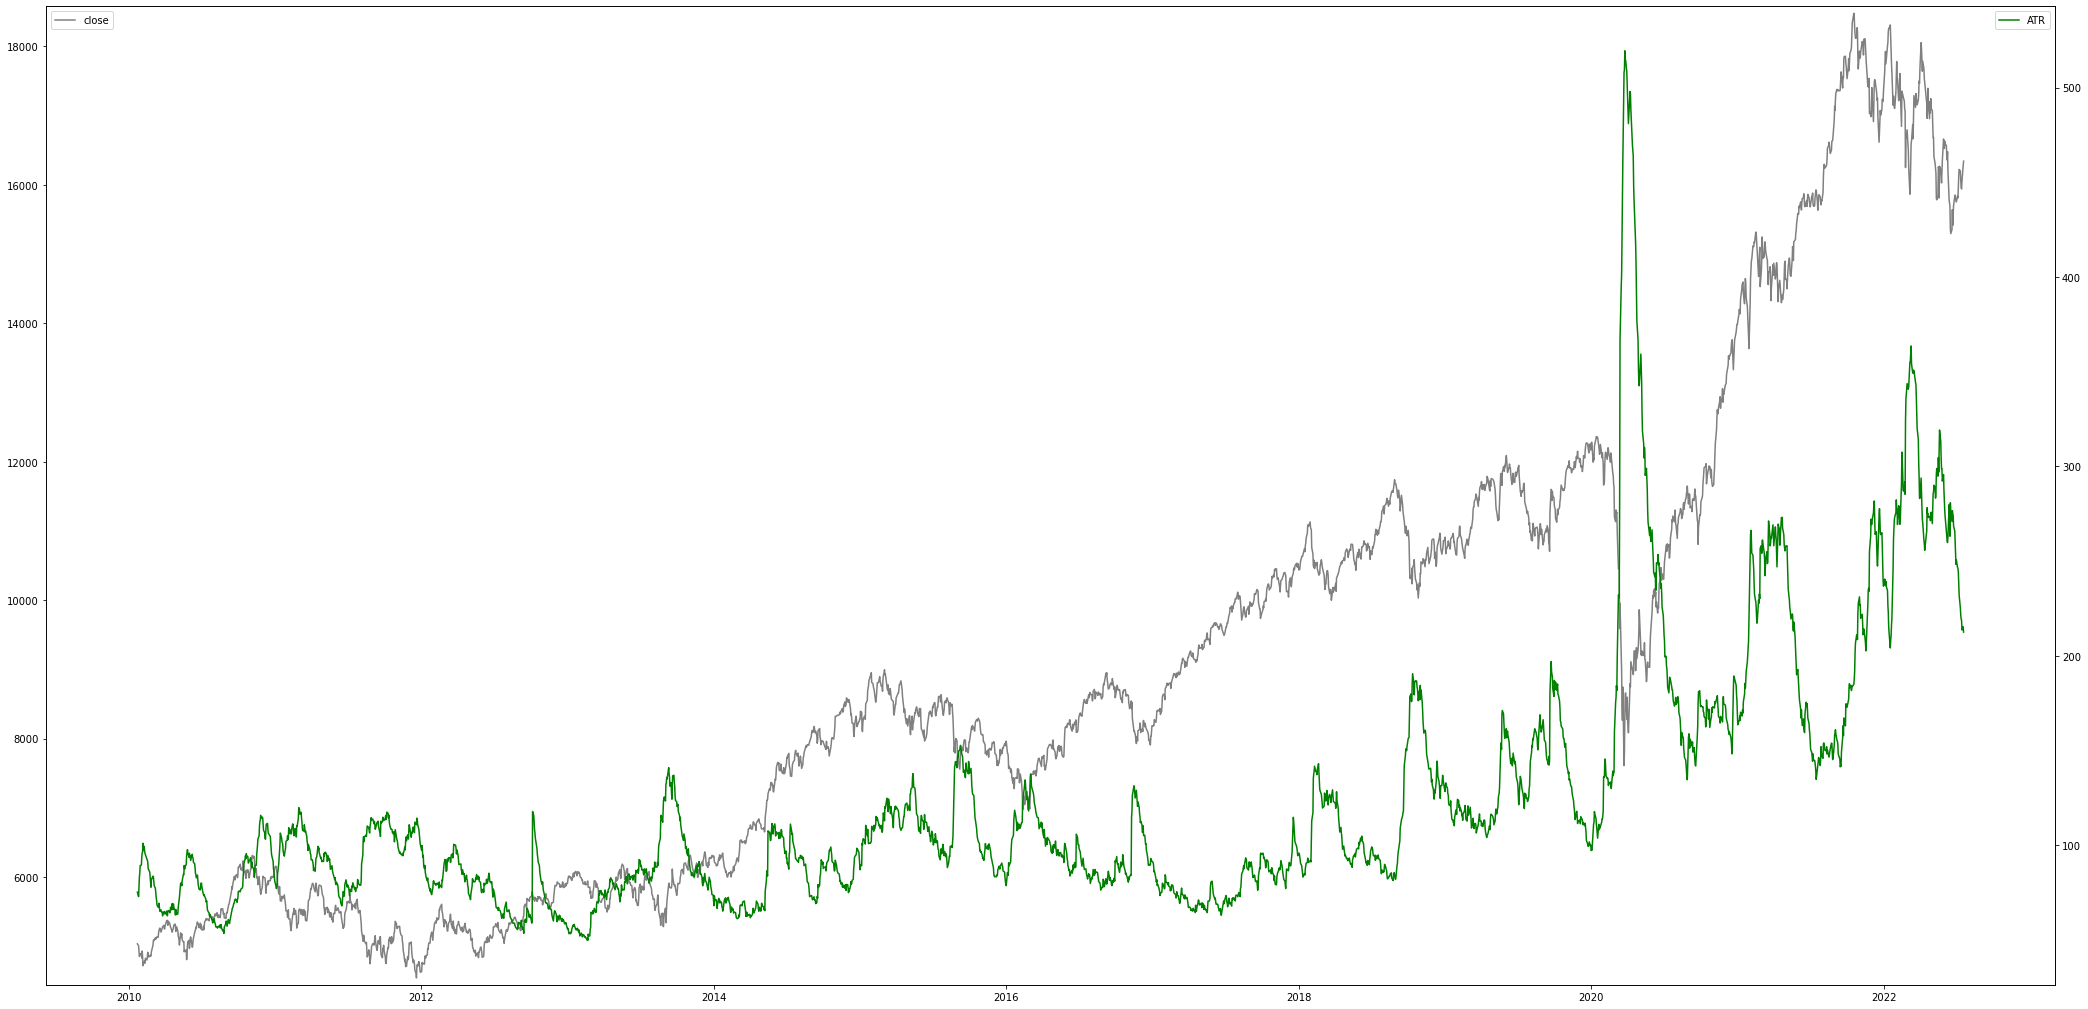

In [5]:
df.dropna(inplace=True)

close = df['close'].tolist()
ATR = df['ATR'].tolist()
index = df.index.tolist()

fg, ax = plt.subplots(nrows=1, ncols=1, figsize=(36, 18), sharex=True)
ax.set_ylim(min(close) -100 , max(close) + 100)

ax.plot(index, close, label ='close', color='gray')

ax2 = ax.twinx()
ax2.plot(index, ATR, color='green', label='ATR')

ax.legend(loc="upper left")
ax2.legend(loc="upper right")

Bollinger Band for <b>Year 2022</b>

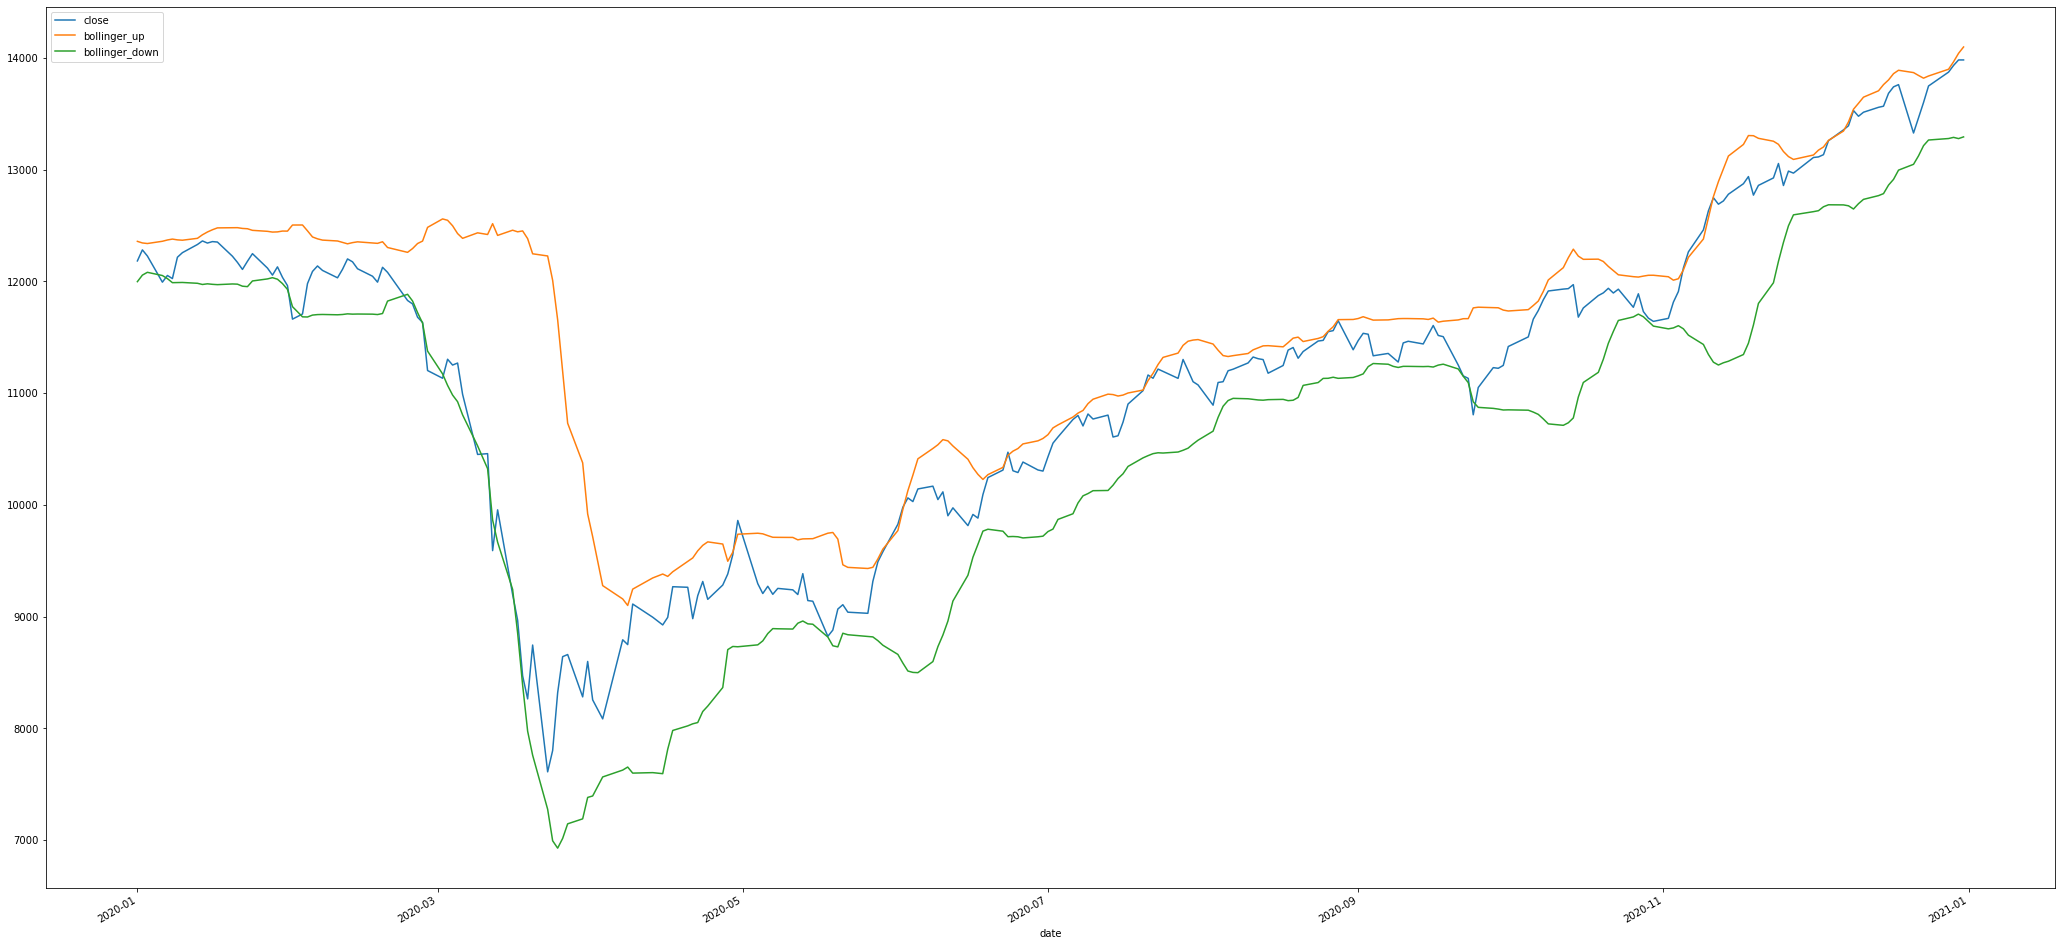

In [6]:
sma = df.close.rolling(range_period).mean() 
std = df.close.rolling(range_period).std()
df['bollinger_up'] = sma + std * 2
df['bollinger_down'] = sma - std * 2
df.loc["2020"][['close', 'bollinger_up', 'bollinger_down']].plot(figsize=(36, 18))
plt.legend()